In [1]:
# https://qiita.com/kzm4269/items/081ff2fdb8a6b0a6112f
# https://qiita.com/ekzemplaro/items/88fbb31a1de4ee148399

# 正式doc
#https://networkx.org/documentation/networkx-2.0/release/release_2.0.html

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import networkx as nx

G = nx.DiGraph()  # 有向グラフ (Directed Graph)

# 頂点の追加
G.add_node(1)                
G.add_nodes_from([3, 4, 5])

# 辺の追加 (頂点も必要に応じて追加されます)
G.add_edge(1, 2)                                    
G.add_edges_from([(1, 3), (2, 5), (3, 4), (4, 5)])

# 辺の削除
G.remove_edge(3, 4)                    
G.remove_edges_from([(1, 3), (2, 5)])

# 頂点の削除 (削除された頂点に接続されている辺も削除されます)
G.remove_node(5)
G.remove_nodes_from([3, 4])

# 指定したパス上の頂点と辺を追加
nx.add_path(G, [1, 2, 3, 4, 5])  # 1 → 2 → 3 → 4 → 5

# 指定した閉路上の頂点と辺を追加
nx.add_cycle(G, [1, 2, 3, 4, 5])  # 1 → 2 → 3 → 4 → 5 → 1

# 放射状に頂点と辺を追加
nx.add_star(G, [1, 2, 3, 4, 5])  # 1 → 2, 1 → 3, 1 → 4, 1 → 5

In [4]:
# Matplotlibを使う

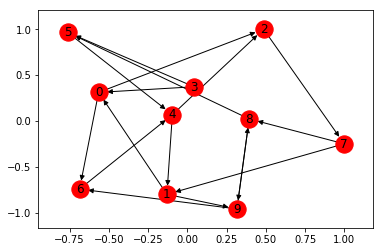

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
nx.add_path(G, [3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
nx.add_path(G, [3, 0, 6, 4, 2, 7, 1, 9, 8, 5])

nx.draw_networkx(G)
plt.show()

In [6]:
## ラッパー

In [7]:
#pip install "https://github.com/CristiFati/Prebuilt-Binaries/blob/master/PyGraphviz/v1.5/pygraphviz-1.5-cp37-cp37m-win_amd64.whl?raw=true"

In [8]:
## 本体インストール手順
# http://ruby.kyoto-wu.ac.jp/info-com/Softwares/Graphviz/
# https://qiita.com/BARANCE_TW/items/c3f7816d38cc9e746bbd

## 本体ダウンロード
#https://gitlab.com/graphviz/graphviz/-/releases
# stable_windows_10_msbuild_Release_Win32_graphviz-2.47.2-win32.zip


In [9]:
import networkx as nx

G = nx.DiGraph()
nx.add_path(G, [3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
nx.add_path(G, [3, 0, 6, 4, 2, 7, 1, 9, 8, 5])

#nx.nx_agraph.view_pygraphviz(G, prog='fdp')  # pygraphvizが必要


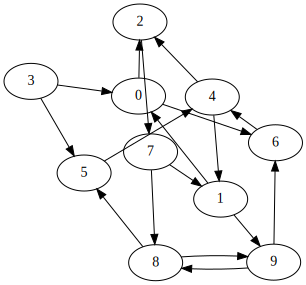

In [10]:
import networkx as nx
from IPython.display import SVG, display

G = nx.DiGraph()
nx.add_path(G, [3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
nx.add_path(G, [3, 0, 6, 4, 2, 7, 1, 9, 8, 5])

svg = SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg'))
display(svg)

In [11]:
#基本的な情報の取得

In [12]:
# 略


In [13]:
#頂点や辺にデータをもたせる

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 3)])

# G.nodes[頂点][属性キー] = 属性値
G.nodes[1]['a'] = 'Alice'

# G.edges[辺][属性キー] = 属性値
G.edges[1, 2]['b'] = 'Bob'

# G.succ[始点][終点][属性キー] = 属性値
G.succ[2][3]['c'] = 'Carol'

# G.pred[終点][始点][属性キー] = 属性値
G.pred[3][1]['d'] = 'Dave'

print(dict(G.nodes))
# {1: {'a': 'Alice'}, 2: {}, 3: {}}

print(dict(G.edges))
# {(1, 2): {'b': 'Bob'}, (1, 3): {'d': 'Dave'}, (2, 3): {'c': 'Carol'}}

print(G.succ)
# {1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}

print(G.pred)
# {1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}

{1: {'a': 'Alice'}, 2: {}, 3: {}}
{(1, 2): {'b': 'Bob'}, (1, 3): {'d': 'Dave'}, (2, 3): {'c': 'Carol'}}
{1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}
{1: {}, 2: {1: {'b': 'Bob'}}, 3: {1: {'d': 'Dave'}, 2: {'c': 'Carol'}}}


In [15]:
import networkx as nx

G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 3)])

# すべての頂点に同じ属性値を設定する.
nx.set_node_attributes(G, name='a', values='Alice')

# 頂点ごとに属性値を個別に設定する. キーは共通.
nx.set_node_attributes(G, name='b', values={2: 'Bob', 3: 'Bravo'})

# まるごと渡す.
nx.set_node_attributes(G, values={1: {'c': 'Carol'}, 2: {'d': 'Dave'}})

print(nx.get_node_attributes(G, 'b'))
# {2: 'Bob', 3: 'Bravo'}

print(nx.get_node_attributes(G, 'c'))
# {2: 'Carol'}

print(dict(G.nodes))
# {1: {'a': 'Alice', 'c': 'Carol'}, 2: {'a': 'Alice', 'b': 'Bob', 'd': 'Dave'}, 3: {'a': 'Alice', 'b': 'Bravo'}}

{2: 'Bob', 3: 'Bravo'}
{1: 'Carol'}
{1: {'a': 'Alice', 'c': 'Carol'}, 2: {'a': 'Alice', 'b': 'Bob', 'd': 'Dave'}, 3: {'a': 'Alice', 'b': 'Bravo'}}


In [16]:
# 探索系の関数

In [17]:
# 略